In [244]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle

In [245]:
df = pd.read_csv("dataset_diabetes/diabetic_data.csv")

In [246]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Let check for any duplicate values in rows as a whole, then encounter id to see if any encounters are in there twice with different values. Lastly we can check to see if any patients have multiple encounters in the dataset.

In [247]:
duplicated = df[df.duplicated()]
print("Duplicated rows (if any):")
duplicated

Duplicated rows (if any):


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


The dataset doesn't appear to have any duplicate rows. Let's check encounter IDs. 

In [248]:
duplicated = df[df.duplicated(subset=["encounter_id"])]
print("Duplicated encounters (if any):")
duplicated

Duplicated encounters (if any):


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


No duplicate encounters either, thats as expected. Let's check patients.

In [249]:
duplicated_pats = df[df.duplicated(subset=["patient_nbr"])]
print(len(duplicated_pats.index))
print("Duplicated patients (if any):")
duplicated_pats

30248
Duplicated patients (if any):


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
79,1070256,23043240,Caucasian,Female,[50-60),?,2,1,4,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
81,1077924,21820806,AfricanAmerican,Male,[50-60),?,1,6,7,3,...,No,No,No,No,No,No,No,No,No,NO
143,2309376,41606064,Caucasian,Male,[20-30),?,2,1,2,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
175,2552952,86240259,Caucasian,Female,[70-80),?,1,3,7,11,...,No,Up,No,No,No,No,No,Ch,Yes,>30
307,3174918,5332491,Other,Female,[60-70),?,6,25,7,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO


Hmmmm, the dataset appears to have quite a bit of duplicate patients. Lets add a column or two to keep track of this. While its not necessarily unusual for a patient to go to the doctor multiple times one thing we definitally will want to know is if they've been readmitted within 30 days before. We will also create a two columns for that. One to track number of readmittances within 30 days on record and another to track number of readmittances beond 30 days on record.

There are some potential problems with this approach which exist within its assumptions. In actuality we may not have access to whether or not a patient was was readmitted at any point for a particular encounter in the dataset. If this encounter was their first we obviously wouldn't have access to the data from the following encounters in practice. however, the dataset doesn't appear to be in any particular order, so trying to account for this by considering the order may not work.

To recap: Create a column to track duplicate patients, as well as how many times they're duplicated, a column to track if they have been readmitted within 30 days within the dataset, and a last one to keep track if they've been readmitted outside of 30 days.

In [250]:
#Creating the column for pat duplicated
df["pat_duplicated"] = df.duplicated(subset=["patient_nbr"], keep=False)
df["pat_duplicated"] = df["pat_duplicated"].replace(False,0)
df["pat_duplicated"] = df["pat_duplicated"].replace(True,1)
df["pat_duplicated"].value_counts()

0    54745
1    47021
Name: pat_duplicated, dtype: int64

Alright, we now have what is in essence a list of all encounters where the patient has a duplicated record in the dataset. As we can see nearly half (roughly 46%) of the encounters are from patients that appear elsewhere in the dataset. 

Lets track the number of times a patient appears in the dataset.

In [251]:
df["pat_duplicated_num"] = df.groupby('patient_nbr')["pat_duplicated"].transform('sum')
df["pat_duplicated_num"] = df["pat_duplicated_num"]\
    .apply(lambda x: max(0,x-1)) #This shlouldn't matter for random forest or decision trees but it looks nicer

print("Total of value counts: ",df["pat_duplicated_num"].value_counts().sum()) #Debug code
df["pat_duplicated_num"].value_counts()

Total of value counts:  101766


0     54745
1     20868
2      9984
3      5684
4      3585
5      2076
6      1449
7       888
8       630
9       420
11      228
10      220
12      182
14      135
19      120
17      108
13       70
22       69
15       64
18       57
16       51
21       44
39       40
27       28
20       21
Name: pat_duplicated_num, dtype: int64

In [252]:
df['readmitted_elsewhere_in30'] = 0 #Begin with column to track full of zeros
df['readmitted_elsewhere_over30'] = 0 #Begin with column to track full of zeros

In [253]:
def label_readmitted_elsewhere(rows):
    for i, row in rows.iterrows():
        new_df = rows.drop(i) #Should stop us from including the answer in a sense in the data
        df.loc[i, "readmitted_elsewhere_over30"] = len(new_df[new_df['readmitted']==">30"].index)
        df.loc[i, "readmitted_elsewhere_in30"] = len(new_df[new_df['readmitted']=="<30"].index)
        del new_df #minor memory optimization

In [254]:
duplicated_pat_nums = df[df["pat_duplicated"]==1].patient_nbr.unique()

for nbr in duplicated_pat_nums:
    label_readmitted_elsewhere(df[df["patient_nbr"]==nbr])

print("Total duplicated patient numbers: ", len(duplicated_pat_nums))

print("Total of value counts 'in30': ",df["readmitted_elsewhere_in30"].value_counts().sum())
print(df["readmitted_elsewhere_in30"].value_counts())

print("Total of value counts 'over30': ",df["readmitted_elsewhere_over30"].value_counts().sum())
print(df["readmitted_elsewhere_over30"].value_counts())

Total duplicated patient numbers:  16773
Total of value counts 'in30':  101766
0     84096
1     11531
2      3189
3      1256
4       545
5       362
6       219
7       177
11      101
8        69
10       56
12       54
9        43
22       29
21       22
23       17
Name: readmitted_elsewhere_in30, dtype: int64
Total of value counts 'over30':  101766
0     67776
1     17303
2      7635
3      3818
4      2061
5      1184
6       706
7       449
8       231
9       199
10      122
12       86
11       79
13       50
16       24
17       23
15       16
14        4
Name: readmitted_elsewhere_over30, dtype: int64


In [255]:
df[df["readmitted_elsewhere_over30"]>13].head() #Quick back of the napkin check to make sure data seems good

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,pat_duplicated,pat_duplicated_num,readmitted_elsewhere_in30,readmitted_elsewhere_over30
29631,96604854,23199021,AfricanAmerican,Male,[50-60),?,1,1,7,3,...,No,No,No,No,No,>30,1,22,7,15
30779,99287754,23199021,AfricanAmerican,Male,[50-60),?,3,1,1,3,...,No,No,No,Ch,Yes,>30,1,22,7,15
31876,102069222,23199021,AfricanAmerican,Male,[50-60),?,3,1,1,1,...,No,No,No,No,Yes,<30,1,22,6,16
32012,102354006,23199021,AfricanAmerican,Male,[50-60),?,1,1,7,2,...,No,No,No,No,Yes,>30,1,22,7,15
32852,104421414,23199021,AfricanAmerican,Male,[50-60),?,1,1,7,3,...,No,No,No,No,No,>30,1,22,7,15


Ok so that all seems good.

We can now format our target variable's values correctly. Our goal is to determine if a diabetic patient will be readmitted within 30 days. So we replace "<30" in readmitted column with 1, and any other value with 0.

0    90409
1    11357
Name: readmitted, dtype: int64

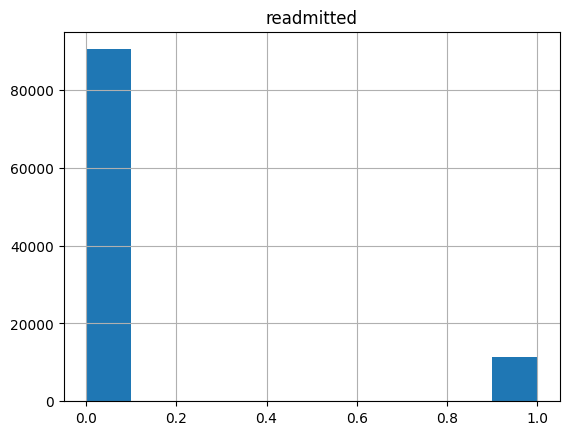

In [256]:
df['readmitted'] = df['readmitted'].replace("<30",1)
df['readmitted'] = df['readmitted'].replace([">30","NO"],0)

df.hist('readmitted')
df['readmitted'].value_counts()

About to do some set up for EDA. 

First I'll split the data into train and test splits. Then I'd like to create a histogram to explore the relationship between discharge disposition id and readmittance. To make the graphs easier to read I'm going to map the categories to their IDs in a new dataframe column. The value counts you'll see are useful info but their mostly so I can make sure I mapped everything correctly.

In the cell right below this one some classes were giving me issues when trying to make sure all classes apear in the training set. I'm going to try and remove rows containing a class that only appears one.

Another way to handle this may be to group low prevelance classes into a single group labelled "other" or something. Though I just didn't get to that this time around

In [257]:
df = df[df.groupby('diag_1').diag_1.transform('count')>4]
df = df[df.groupby('diag_2').diag_2.transform('count')>4]
df = df[df.groupby('diag_3').diag_3.transform('count')>4]
df = df[df.groupby('medical_specialty').medical_specialty.transform('count')>4]
df = df[df.groupby('payer_code').payer_code.transform('count')>4]

print(len(df.index))
df.head()

100297


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,pat_duplicated,pat_duplicated_num,readmitted_elsewhere_in30,readmitted_elsewhere_over30
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,0,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,Ch,Yes,0,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,Yes,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,Ch,Yes,0,0,0,0,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,No,Ch,Yes,0,0,0,0,0


Lets split the data into train and test splits

In [258]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=1337)

print("---Train---")
print(train['readmitted'].value_counts())
print("\n")
print("---Test---")
print(test['readmitted'].value_counts())

---Train---
0    71288
1     8949
Name: readmitted, dtype: int64


---Test---
0    17779
1     2281
Name: readmitted, dtype: int64


In [259]:
train["discharge_disposition_id"].value_counts()

1     47491
3     10965
6     10178
18     2914
2      1693
22     1581
11     1313
5       924
25      779
4       633
7       493
23      325
13      310
14      300
28      109
8        86
15       52
24       32
9        21
17        9
16        9
19        6
10        5
27        4
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [260]:
x_labels = ["Discharged to home",
"Discharged/transferred to another short term hospital",
"Discharged/transferred to SNF",
"Discharged/transferred to ICF",
"Discharged/transferred to another type of inpatient care institution",
"Discharged/transferred to home with home health service",
"Left AMA",
"Discharged/transferred to home under care of Home IV provider",
"Admitted as an inpatient to this hospital",
"Neonate discharged to another hospital for neonatal aftercare",
"Expired",
"Still patient or expected to return for outpatient services",
"Hospice / home",
"Hospice / medical facility",
"Discharged/transferred within this institution to Medicare approved swing bed",
"Discharged/transferred/referred another institution for outpatient services",
"Discharged/transferred/referred to this institution for outpatient services",
"NULL",
"Expired at home. Medicaid only, hospice.",
"Expired in a medical facility. Medicaid only, hospice.",
"Expired, place unknown. Medicaid only, hospice.",
"Discharged/transferred to another rehab fac including rehab units of a hospital .",
"Discharged/transferred to a long term care hospital.",
"Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
"Not Mapped",
"Unknown/Invalid",
"Discharged/transferred to a federal health care facility.",
"Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
"Discharged/transferred to a Critical Access Hospital (CAH).",
"Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere"]

#This is not a very effecient way of doing this but it's fine for now
train["discharge_disp_cats"] = [x_labels[row["discharge_disposition_id"]-1] for index, row in train.iterrows()]
train["discharge_disp_cats"].value_counts()

Discharged to home                                                                                           47491
Discharged/transferred to SNF                                                                                10965
Discharged/transferred to home with home health service                                                      10178
NULL                                                                                                          2914
Discharged/transferred to another short term hospital                                                         1693
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1581
Expired                                                                                                       1313
Discharged/transferred to another type of inpatient care institution                                           924
Not Mapped                                                                      

Those values seem correct, we can see only 26 of the 30 categories appear in our dataset. To make the plots easier to read I'm going to print the histogram as three seperate plots, each with around a 3rd (26 doesn't evenly divide by 3) of the categories in the x axis.

In [261]:
cats = train["discharge_disp_cats"].unique();

In [262]:
subset_val = train['readmitted'].value_counts(normalize=True)
subset_val[1]

0.11153208619464836

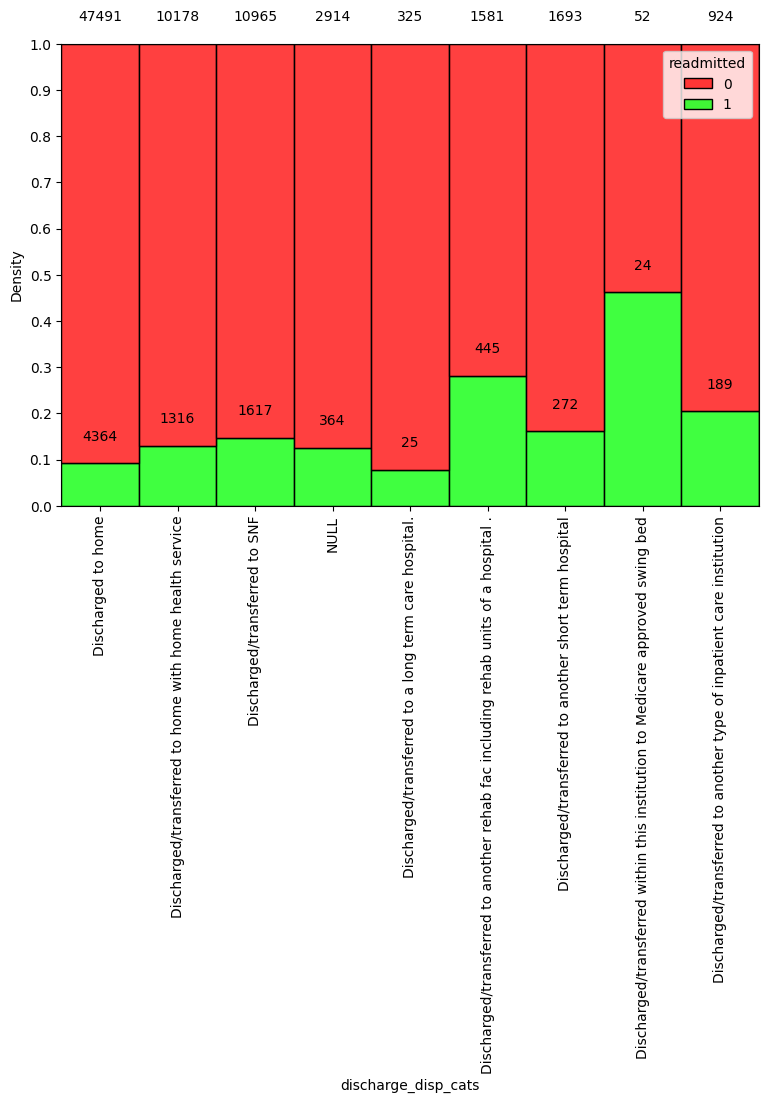

In [263]:
from matplotlib.pyplot import figure

figure(figsize=(9,6))

palette=["#ff0000","#00ff00"]
y = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

ax = sns.histplot(x = train["discharge_disp_cats"], hue=train['readmitted'], multiple="fill",
                  stat = 'density', common_norm=True, palette=palette)\
                  .set(xlim=(-0.5,8.5))

for bar in range(9):
    subset = train[train["discharge_disp_cats"] == cats[bar]]
    subset_val = subset['readmitted'].value_counts()
    subset_val_norm = subset['readmitted'].value_counts(normalize=True)
    plt.text(bar, (0 if 1 == len(subset_val_norm) else subset_val_norm[1])+0.05, 
             str("0" if 1 == len(subset_val) else str(subset_val[1])), ha="center")
    plt.text(bar, 1.05, str(subset_val.sum()),ha="center")
    del subset, subset_val

plt.tick_params(axis='x', rotation=90)
plt.yticks(y);


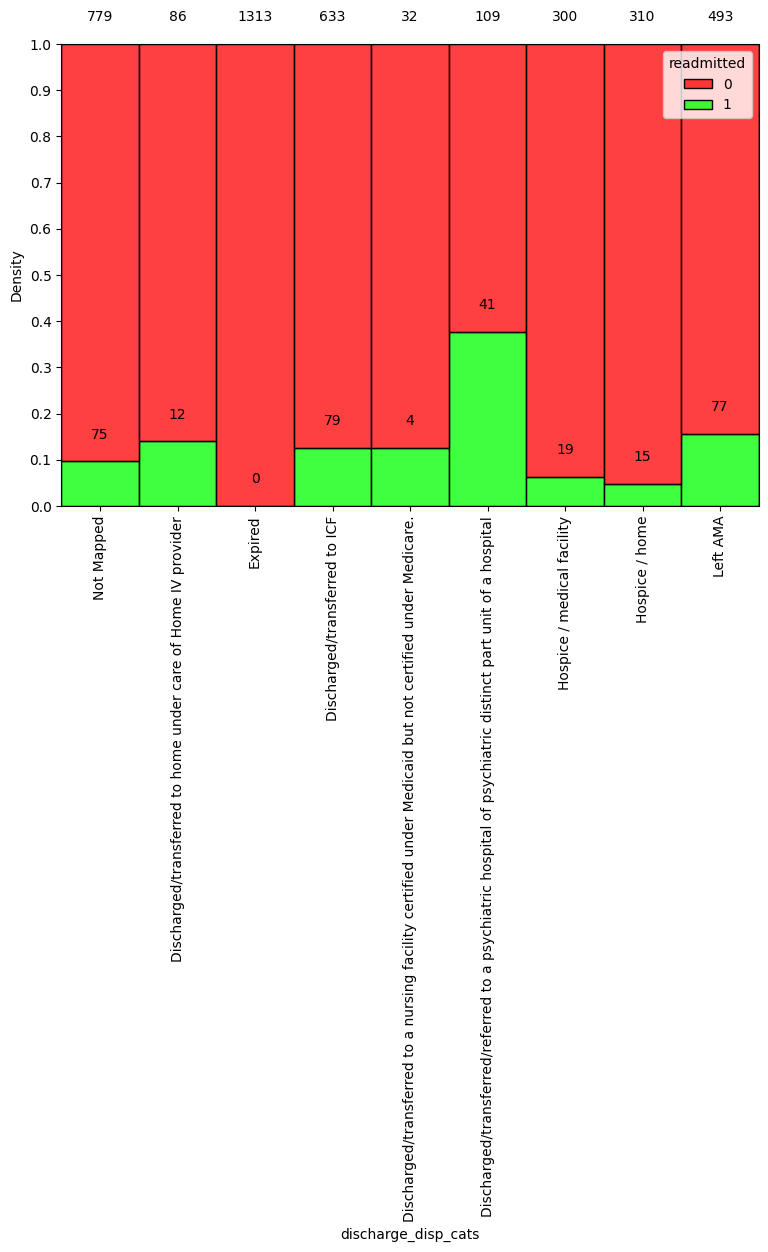

In [264]:
figure(figsize=(9,6))
ax = sns.histplot(x = train["discharge_disp_cats"], hue=train['readmitted'], multiple="fill", 
                  stat = 'density', common_norm=True, palette=palette).set(xlim=(8.5,17.5))

for bar in range(9):
    subset = train[train["discharge_disp_cats"] == cats[bar+9]]
    subset_val = subset['readmitted'].value_counts()
    subset_val_norm = subset['readmitted'].value_counts(normalize=True)
    plt.text(bar+9, (0 if 1 == len(subset_val_norm) else subset_val_norm[1])+0.05, 
             str("0" if 1 == len(subset_val) else str(subset_val[1])), ha="center")
    plt.text(bar+9, 1.05, str(subset_val.sum()),ha="center")
    del subset, subset_val

plt.tick_params(axis='x', rotation=90)
plt.yticks(y);

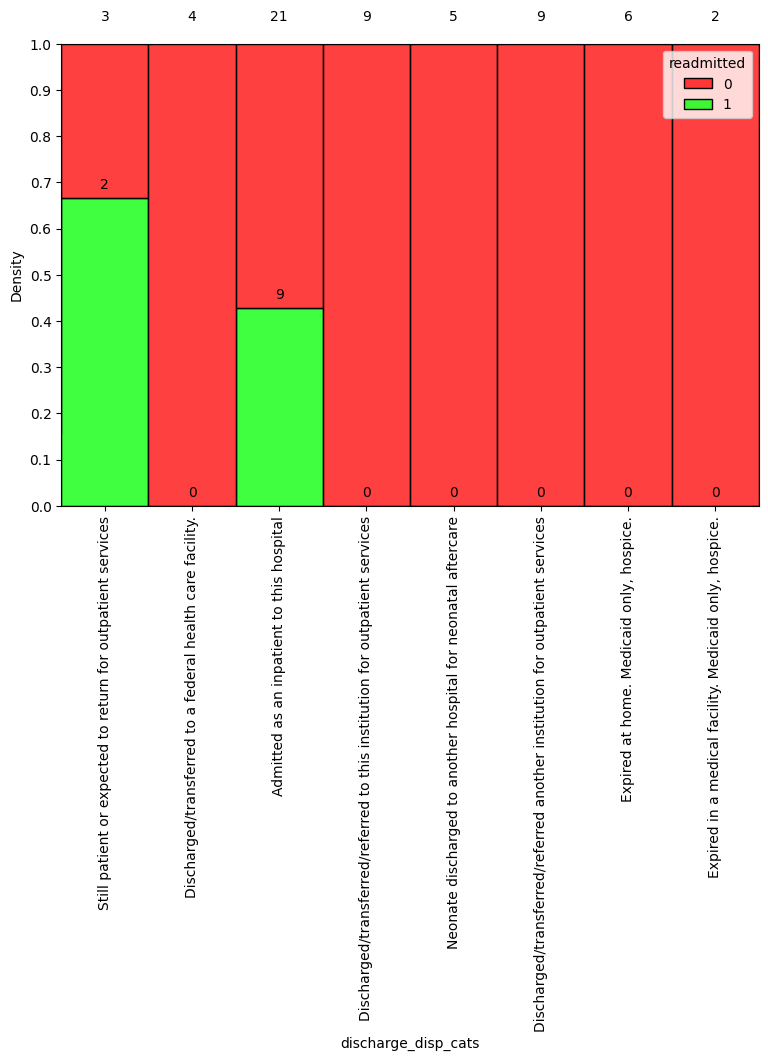

In [265]:
figure(figsize=(9,6))
ax = sns.histplot(x = train["discharge_disp_cats"], hue=train['readmitted'], multiple="fill", 
                  stat = 'density', common_norm=True, palette=palette).set(xlim=(17.5,25.5))

for bar in range(8):
    subset = train[train["discharge_disp_cats"] == cats[bar+18]]
    subset_val = subset['readmitted'].value_counts()
    subset_val_norm = subset['readmitted'].value_counts(normalize=True)
    plt.text(bar+18, (0 if not 1 in subset_val_norm else subset_val_norm[1])+0.02, 
             str("0" if 1 not in subset_val else str(subset_val[1])), ha="center")
    plt.text(bar+18, 1.05, str(subset_val.sum()),ha="center")
    del subset, subset_val

plt.tick_params(axis='x', rotation=90)
plt.yticks(y);

We already saw the distribution of the value counts for distribution categories earlier as text but if nothing else besides just for fun lets look at it as a kde plot.

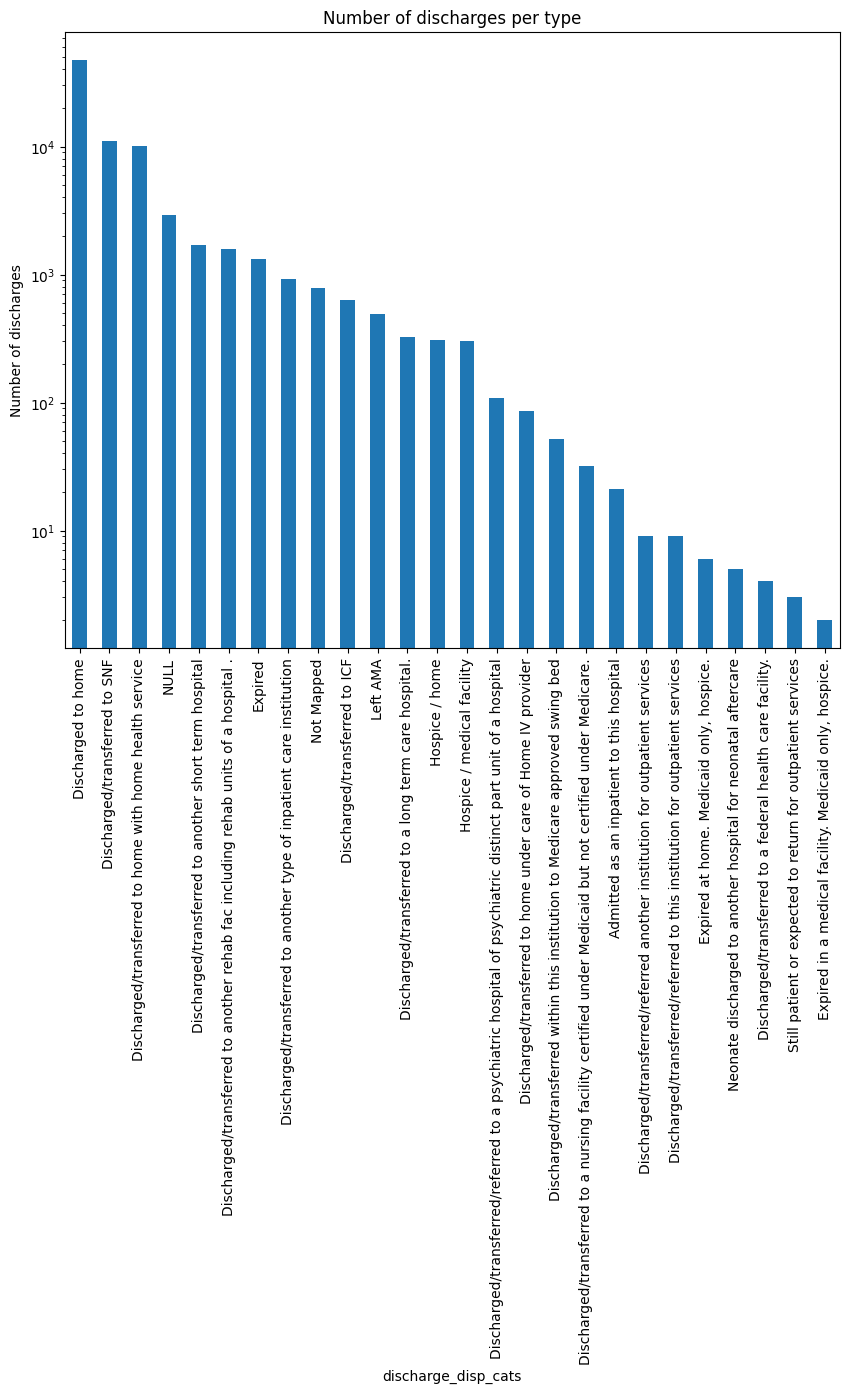

In [266]:
train.groupby(["discharge_disp_cats"])\
     .apply(lambda x: len(x["encounter_id"].unique()))\
     .sort_values(ascending=False)\
     .plot(kind="bar", figsize=(10,8))
plt.title("Number of discharges per type")
plt.ylabel("Number of discharges")
plt.yscale('log')
plt.show()

By far the most common reason for discharge is "discharged to home", with "NULL" being the 4th most populus category. 

I'm going to drop the discharge_disp_cats column now as it's served its purpose. 

In [267]:
train = train.drop(labels=["discharge_disp_cats"], axis=1)

Text(0.5, 1.0, 'Max glucose serum results vs readmission')

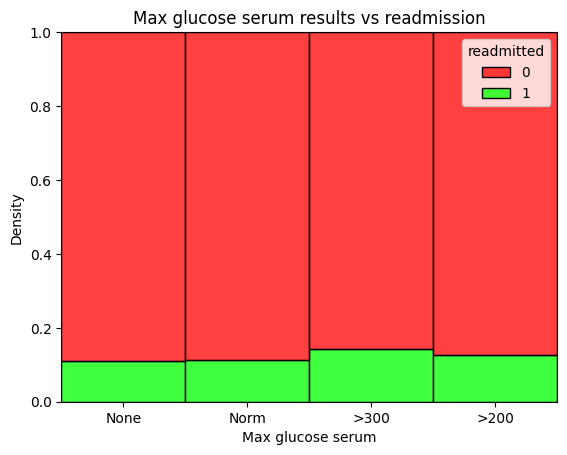

In [268]:
ax = sns.histplot(x = train["max_glu_serum"], hue=train['readmitted'], multiple="fill", 
                  stat = 'density', common_norm=True, palette=palette)

ax.set(ylabel="Density", xlabel="Max glucose serum")
plt.title("Max glucose serum results vs readmission")

Text(0.5, 1.0, 'A1C test results vs readmission')

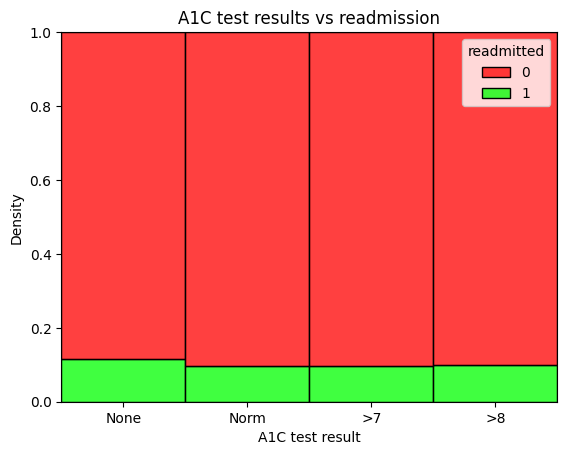

In [269]:
ax = sns.histplot(x = train["A1Cresult"], hue=train['readmitted'], multiple="fill", 
                  stat = 'density', common_norm=True, palette=palette)

ax.set(ylabel="Density", xlabel="A1C test result")
plt.title("A1C test results vs readmission")

Text(0.5, 1.0, 'Days in hospital vs frequency of readmission')

<Figure size 1000x600 with 0 Axes>

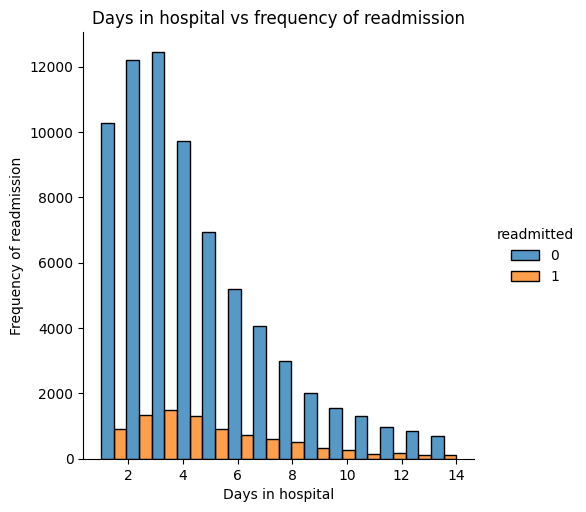

In [270]:
fig = plt.figure(figsize=(10,6))
ax=sns.displot(data=train, x="time_in_hospital", hue="readmitted", kind="hist", bins=14, multiple='dodge')
ax.set(xlabel="Days in hospital", ylabel="Frequency of readmission")
plt.title("Days in hospital vs frequency of readmission")

Text(0.5, 1.0, 'Number of lab procedures vs frequency of readmission')

<Figure size 1000x600 with 0 Axes>

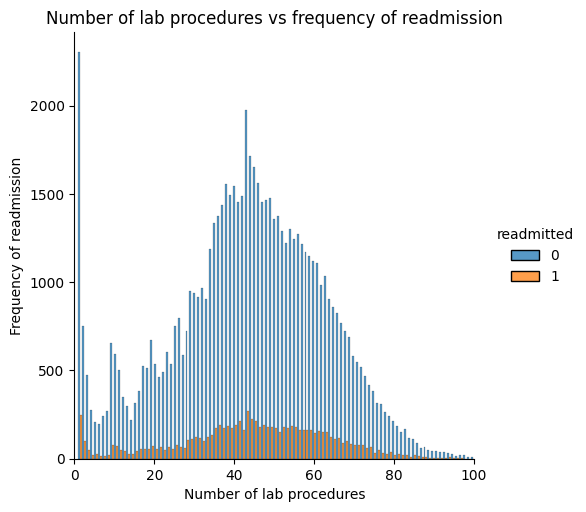

In [271]:
fig = plt.figure(figsize=(10,6))
ax=sns.displot(data=train, x="num_lab_procedures", hue="readmitted", kind="hist", bins=132, multiple='dodge').set(xlim=(0,100))
ax.set(xlabel="Number of lab procedures", ylabel="Frequency of readmission")
plt.title("Number of lab procedures vs frequency of readmission")

Text(0.5, 1.0, 'Number of procedures vs frequency of readmission')

<Figure size 1000x600 with 0 Axes>

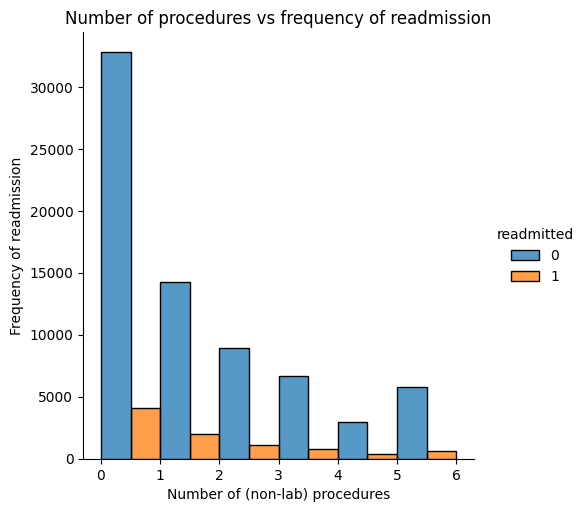

In [272]:
fig = plt.figure(figsize=(10,6))
ax=sns.displot(data=train, x="num_procedures", hue="readmitted", kind="hist", bins=6, multiple='dodge')
ax.set(xlabel="Number of (non-lab) procedures", ylabel="Frequency of readmission")
plt.title("Number of procedures vs frequency of readmission")

Text(0.5, 1.0, 'Number of outpatient visits vs frequency of readmission')

<Figure size 1000x600 with 0 Axes>

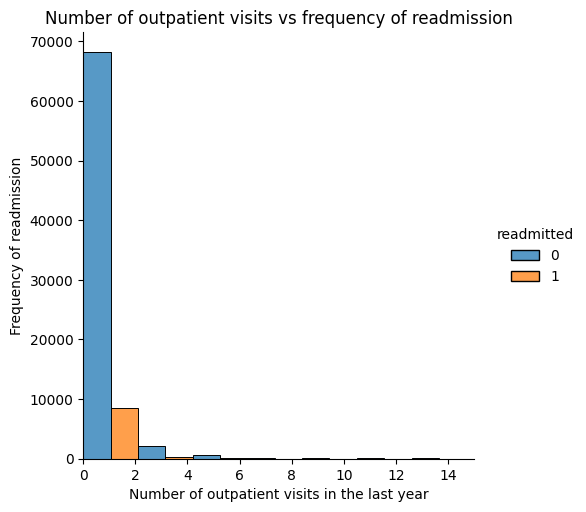

In [273]:
fig = plt.figure(figsize=(10,6))
ax=sns.displot(data=train, x="number_outpatient", hue="readmitted", kind="hist", bins=20, multiple='dodge').set(xlim=(0,15))
ax.set(xlabel="Number of outpatient visits in the last year", ylabel="Frequency of readmission")
plt.title("Number of outpatient visits vs frequency of readmission")

Text(0.5, 1.0, 'Number of emergency visits vs frequency of readmission')

<Figure size 1000x600 with 0 Axes>

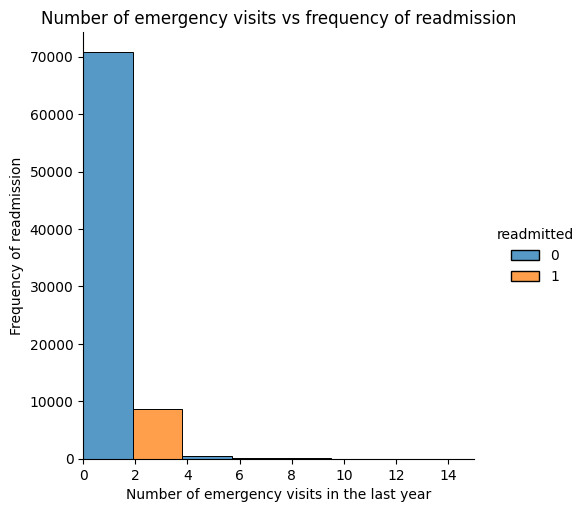

In [274]:
fig = plt.figure(figsize=(10,6))
ax=sns.displot(data=train, x="number_emergency", hue="readmitted", kind="hist", bins=20, multiple='dodge').set(xlim=(0,15))
ax.set(xlabel="Number of emergency visits in the last year", ylabel="Frequency of readmission")
plt.title("Number of emergency visits vs frequency of readmission")

Text(0.5, 1.0, 'Number of diagnoses vs frequency of readmission')

<Figure size 1000x600 with 0 Axes>

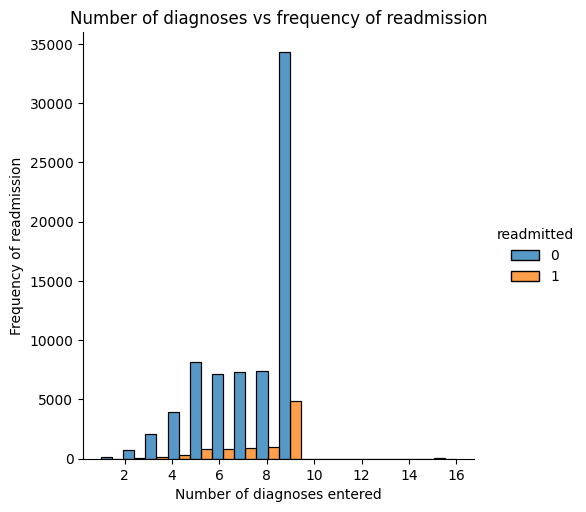

In [275]:
fig = plt.figure(figsize=(10,6))
ax=sns.displot(data=train, x="number_diagnoses", hue="readmitted", kind="hist", bins=16, multiple='dodge')
ax.set(xlabel="Number of diagnoses entered", ylabel="Frequency of readmission")
plt.title("Number of diagnoses vs frequency of readmission")

There's a huge spike right around 9 diagnoses entered. Not sure why that is. For the purpose of making an ML model the distribution seems to behave as expected so it probably doesn't warrant a deep dive. But I would like to just know the exact percentage of encounters with 9 diagnoses entered.

In [455]:
len(train[train["number_diagnoses"]==9].index)/len(train.index)

0.48769271034560113

In [276]:
medications = ['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

I'm going to do some label encoding by hand so I can more easily measure the variance.

In [277]:
train[medications] = train[medications].replace("Down", -1)
test[medications] = test[medications].replace("Down", -1)
train[medications] = train[medications].replace("No", 0)
test[medications] = test[medications].replace("No", 0)
train[medications] = train[medications].replace("Steady", 1)
test[medications] = test[medications].replace("Steady", 1)
train[medications] = train[medications].replace("Up", 2)
test[medications] = test[medications].replace("Up", 2)

train[medications].head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
69983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
52661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20701,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
95465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
25424,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [278]:
train[medications].var()

metformin                   0.189050
repaglinide                 0.018365
nateglinide                 0.007491
chlorpropamide              0.001021
glimepiride                 0.058638
acetohexamide               0.000012
glipizide                   0.132345
glyburide                   0.118458
tolbutamide                 0.000212
pioglitazone                0.074453
rosiglitazone               0.063088
acarbose                    0.003368
miglitol                    0.000474
troglitazone                0.000025
tolazamide                  0.000424
examide                     0.000000
citoglipton                 0.000000
insulin                     0.703679
glyburide-metformin         0.007070
glipizide-metformin         0.000112
glimepiride-pioglitazone    0.000012
metformin-rosiglitazone     0.000025
metformin-pioglitazone      0.000000
dtype: float64

We will drop the medications with near-zero variance. In this case that will be medications with 0.00025 variance or lower.

In [279]:
train = train.drop(['acetohexamide',
                    'troglitazone',
                    'examide',
                    'citoglipton',
                    'glimepiride-pioglitazone',
                    'metformin-rosiglitazone',
                    'metformin-pioglitazone'],axis=1)
test = test.drop(['acetohexamide',
                    'troglitazone',
                    'examide',
                    'citoglipton',
                    'glimepiride-pioglitazone',
                    'metformin-rosiglitazone',
                    'metformin-pioglitazone'],axis=1)
train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted,pat_duplicated,pat_duplicated_num,readmitted_elsewhere_in30,readmitted_elsewhere_over30
69983,200008020,103420926,Caucasian,Female,[40-50),?,3,1,1,1,...,1,0,0,No,Yes,0,1,3,1,1
52661,155492124,82706373,AfricanAmerican,Female,[60-70),?,1,6,7,3,...,1,0,0,No,Yes,0,0,0,0,0
20701,72747984,104863896,Caucasian,Female,[70-80),?,6,1,17,1,...,1,0,0,Ch,Yes,0,0,0,0,0
95465,362017892,92785896,AfricanAmerican,Male,[60-70),?,1,1,7,10,...,1,0,0,No,Yes,0,1,3,1,2
25424,84942864,4925457,Caucasian,Female,[80-90),?,1,1,6,11,...,1,0,0,Ch,Yes,0,0,0,0,0


I'm going to do some feature encoding by hand. For this project I'd like to try it on multiple 'versions' of this dataset. One where I do little feature grouping and one where I do more feature grouping so I can compare the results.

First lets take a look at the list of features we still have to encode.

In [280]:
features_to_encode = train.columns[train.dtypes==object].tolist()
print("Number of categorical features: ",len(features_to_encode))
features_to_encode

Number of categorical features:  13


['race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'change',
 'diabetesMed']

In [281]:
def encode_age(dataframe):
    dataframe['age'] = dataframe['age'].replace('[0-10)',10)
    dataframe['age'] = dataframe['age'].replace('[10-20)',20)
    dataframe['age'] = dataframe['age'].replace('[20-30)',30)
    dataframe['age'] = dataframe['age'].replace('[30-40)',40)
    dataframe['age'] = dataframe['age'].replace('[40-50)',50)
    dataframe['age'] = dataframe['age'].replace('[50-60)',60)
    dataframe['age'] = dataframe['age'].replace('[60-70)',70)
    dataframe['age'] = dataframe['age'].replace('[70-80)',80)
    dataframe['age'] = dataframe['age'].replace('[80-90)',90)
    dataframe['age'] = dataframe['age'].replace('[90-100)',100)
    return dataframe

In [282]:
train = encode_age(train)
test = encode_age(test)

train["age"].head(3)

69983    50
52661    70
20701    80
Name: age, dtype: int64

In [283]:
def encode_weight(dataframe):
    dataframe['weight'] = dataframe['weight'].replace('[0-25)',25)
    dataframe['weight'] = dataframe['weight'].replace('[25-50)',50)
    dataframe['weight'] = dataframe['weight'].replace('[50-75)',75)
    dataframe['weight'] = dataframe['weight'].replace('[75-100)',100)
    dataframe['weight'] = dataframe['weight'].replace('[100-125)',125)
    dataframe['weight'] = dataframe['weight'].replace('[125-150)',150)
    dataframe['weight'] = dataframe['weight'].replace('[150-175)',175)
    dataframe['weight'] = dataframe['weight'].replace('[175-200)',200)
    dataframe['weight'] = dataframe['weight'].replace('>200',225)
    return dataframe

In [284]:
train = encode_weight(train)
test = encode_weight(test)

train[train["weight"]!='?']["weight"].head(3)

31872    100
44324    125
13465    100
Name: weight, dtype: object

I'm not going to replace the "?" in all columns with a -1000, this will just ensure that value is constant a unqiue through the whole dataset. This will get overriden if a feature is later label encoded, though the actual number shouldn't matter as I'll be using random forest and boosted decision trees which should be invarient to the actual numeric quantity chosen for the value.

In [285]:
#Make a copy for later grouping
train_copy = train
test_copy = test

In [158]:
train = train.replace("?",-1000)
test = test.replace("?",-1000)
train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted,pat_duplicated,pat_duplicated_num,readmitted_elsewhere_in30,readmitted_elsewhere_over30
69983,200008020,103420926,Caucasian,Female,50,-1000,3,1,1,1,...,1,0,0,No,Yes,0,1,3,1,1
52661,155492124,82706373,AfricanAmerican,Female,70,-1000,1,6,7,3,...,1,0,0,No,Yes,0,0,0,0,0
20701,72747984,104863896,Caucasian,Female,80,-1000,6,1,17,1,...,1,0,0,Ch,Yes,0,0,0,0,0
95465,362017892,92785896,AfricanAmerican,Male,70,-1000,1,1,7,10,...,1,0,0,No,Yes,0,1,3,1,2
25424,84942864,4925457,Caucasian,Female,90,-1000,1,1,6,11,...,1,0,0,Ch,Yes,0,0,0,0,0


<h4>Label Encoding</h4>

I'm going to use sklearn's labelencoder to encode the rest of the labels.

In [159]:
features_to_encode = train.columns[train.dtypes==object].tolist()
print("Features that still need encoding")
features_to_encode

Features that still need encoding


['race',
 'gender',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'change',
 'diabetesMed']

In [161]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in features_to_encode:
    train[feature]=le.fit_transform(train[feature].astype(str))
    test[feature]=le.transform(test[feature].astype(str))
    
train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted,pat_duplicated,pat_duplicated_num,readmitted_elsewhere_in30,readmitted_elsewhere_over30
69983,200008020,103420926,3,0,50,-1000,3,1,1,1,...,1,0,0,1,1,0,1,3,1,1
52661,155492124,82706373,1,0,70,-1000,1,6,7,3,...,1,0,0,1,1,0,0,0,0,0
20701,72747984,104863896,3,0,80,-1000,6,1,17,1,...,1,0,0,0,1,0,0,0,0,0
95465,362017892,92785896,1,1,70,-1000,1,1,7,10,...,1,0,0,1,1,0,1,3,1,2
25424,84942864,4925457,3,0,90,-1000,1,1,6,11,...,1,0,0,0,1,0,0,0,0,0


Split target variables

In [162]:
train_y = train['readmitted']
test_y = test['readmitted']

train_x = train.drop(['readmitted'],axis=1)
test_x = test.drop(['readmitted'],axis=1)

<h2>Modeling without feature grouping</h2>

<h4>Random Forest</h4>

In [163]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=250, max_depth=15, n_jobs=-1, criterion="entropy", random_state=43)

In [164]:
rf_classifier.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=250,
                       n_jobs=-1, random_state=43)

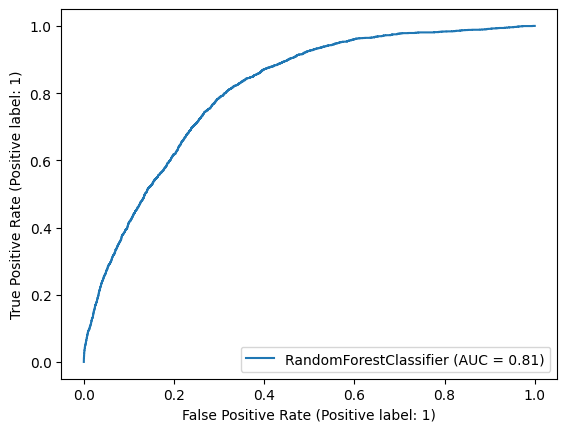

In [457]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_classifier, test_x, test_y)
plt.show()

I am admittedly sceptical of this result and fear that the 3 parameters added to track reoccurences may be leaking data it shouldn't into the model.

In [166]:
#Save model
pickle.dump(rf_classifier, open("rf_2.sav","wb"))

In [167]:
#Calculate confusion matrix items
#Random forest
from sklearn.metrics import confusion_matrix

test_predict_Y=rf_classifier.predict(test_x)
cm = confusion_matrix(test_y, test_predict_Y, labels=[0, 1])

FN = cm.sum(axis=0) - np.diag(cm)  
FP = cm.sum(axis=1) - np.diag(cm)
TN = np.diag(cm)
TP = cm.sum() - (FP + FN + TN)

print(cm)
print("False Positive Rates: ",FP)
print("False Negative Rates: ",FN)
print("True Positive Rates: ", TP)
print("True Negative Rates: ",TN)

[[17769    10]
 [ 2235    46]]
False Positive Rates:  [  10 2235]
False Negative Rates:  [2235   10]
True Positive Rates:  [   46 17769]
True Negative Rates:  [17769    46]


<h4>Tunned Random Forest</h4>

In [168]:
from sklearn.model_selection import GridSearchCV

#Set the parameters we want to tune and the values we wants to test
param_grid={
    'n_estimators': [100,250],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy',],
    'max_depth': [15, 25, 35],
    'min_samples_split': [2,5,10]
}
rf_classifier = pickle.load(open("rf_2.sav", 'rb')) #Load model so we can restart kernel w/ out having to retrain
clf_hyper = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='recall', verbose=1, n_jobs=-1)

#Start searching for the best combo
clf_hyper.fit(train_x, train_y)
pickle.dump(clf_hyper, open("rf_hyper_2.sav","wb")) #Save

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [169]:
clf_hyper.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [170]:
rf_hyper = clf_hyper.best_estimator_
rf_hyper.fit(train_x, train_y)

RandomForestClassifier(max_depth=25, n_jobs=-1, random_state=43)

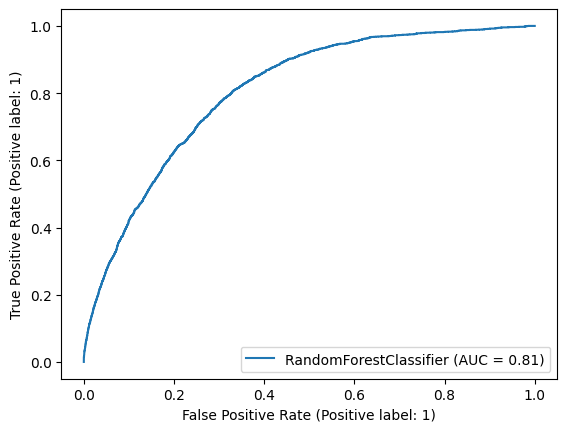

In [171]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_hyper, test_x, test_y)
plt.show()

In [172]:
#Save model
pickle.dump(rf_hyper, open("rf_hyper_2.sav","wb"))

In [173]:
#Calculate confusion matrix items
#Random forest w/ hyper-parameter tunning
from sklearn.metrics import confusion_matrix

test_predict_Y=rf_hyper.predict(test_x)
cm = confusion_matrix(test_y, test_predict_Y, labels=[0, 1])

FN = cm.sum(axis=0) - np.diag(cm)  
FP = cm.sum(axis=1) - np.diag(cm)
TN = np.diag(cm)
TP = cm.sum() - (FP + FN + TN)

print(cm)
print("False Positive Rates: ",FP)
print("False Negative Rates: ",FN)
print("True Positive Rates: ", TP)
print("True Negative Rates: ",TN)

[[17735    44]
 [ 2192    89]]
False Positive Rates:  [  44 2192]
False Negative Rates:  [2192   44]
True Positive Rates:  [   89 17735]
True Negative Rates:  [17735    89]


In [174]:
from sklearn.metrics import recall_score

test_predict_Y = rf_classifier.predict(test_x)
print("Recall random forest: ",recall_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = rf_hyper.predict(test_x)
print("Recall random forest w/ HP Tunning: ",recall_score(test_y, test_predict_Y, average='binary'))

Recall random forest:  0.020166593599298552
Recall random forest w/ HP Tunning:  0.039017974572555895


<h4>XGBoost Tree</h4>

In [175]:
from sklearn.metrics import classification_report
import xgboost as xgb

dtrain=xgb.DMatrix(data=train_x, label=train_y)

xgb_model = xgb.XGBClassifier(n_estimators=250,eval_metric=recall_score,booster='gbtree',max_depth=15,eta='0.03',
                              colsample_bytree=0.5, early_Stopping_rounds=10, n_jobs=8, verbose_eval=1, objective='binary:logistic')
xgb_model.fit(train_x,train_y)
hr_pred = xgb_model.predict(test_x)
print(classification_report(test_y, hr_pred))

[15:13:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_Stopping_rounds", "verbose_eval" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17779
           1       0.77      0.07      0.12      2281

    accuracy                           0.89     20060
   macro avg       0.83      0.53      0.53     20060
weighted avg       0.88      0.89      0.85     20060



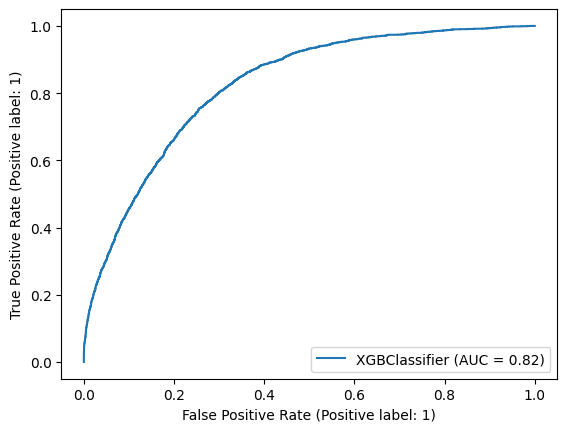

In [176]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(xgb_model, test_x, test_y)
plt.show()

In [177]:
#XGBoost
from sklearn.metrics import confusion_matrix

test_predict_Y=xgb_model.predict(test_x)
cm = confusion_matrix(test_y, test_predict_Y, labels=[0, 1])

FN = cm.sum(axis=0) - np.diag(cm)  
FP = cm.sum(axis=1) - np.diag(cm)
TN = np.diag(cm)
TP = cm.sum() - (FP + FN + TN)

print(cm)
print("False Positive Rates: ",FP)
print("False Negative Rates: ",FN)
print("True Positive Rates: ", TP)
print("True Negative Rates: ",TN)

[[17733    46]
 [ 2130   151]]
False Positive Rates:  [  46 2130]
False Negative Rates:  [2130   46]
True Positive Rates:  [  151 17733]
True Negative Rates:  [17733   151]


In [178]:
#Save model
pickle.dump(xgb_model, open("xgb_model_2.sav","wb"))

In [179]:
from sklearn.metrics import recall_score

test_predict_Y = xgb_model.predict(test_x)
print("Recall XGBoost: ",recall_score(test_y, test_predict_Y, average='binary'))

Recall XGBoost:  0.0661990355107409


All of our models so far appear to me underfitting. Sure to AUC looks ok, though a lot of that can be contributed to our dataset simply being unbalanced. Just to see, let's real quick take a look at the performance difference with a model trained on a balanced dataset.

<h2>Testing models trained on more balanced data</h2>

In [180]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5) #Minority class to majority class ratio is 1:2
train_x_balanced, train_y_balanced = undersample.fit_resample(train_x, train_y)

In [181]:
train_y_balanced.value_counts()

0    17898
1     8949
Name: readmitted, dtype: int64

<h4>Tunned Random Forest</h4>

In [182]:
#We're going to just immediately do gridsearch

clf_hyper_balanced = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='recall', n_jobs=-1)

In [183]:
clf_hyper_balanced.fit(train_x_balanced, train_y_balanced)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, 35],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250]},
             scoring='recall')

In [184]:
clf_hyper_balanced.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 250}

In [185]:
rf_hyper_balanced = clf_hyper_balanced.best_estimator_
rf_hyper_balanced.fit(train_x_balanced, train_y_balanced)

RandomForestClassifier(criterion='entropy', max_depth=35, min_samples_split=10,
                       n_estimators=250)

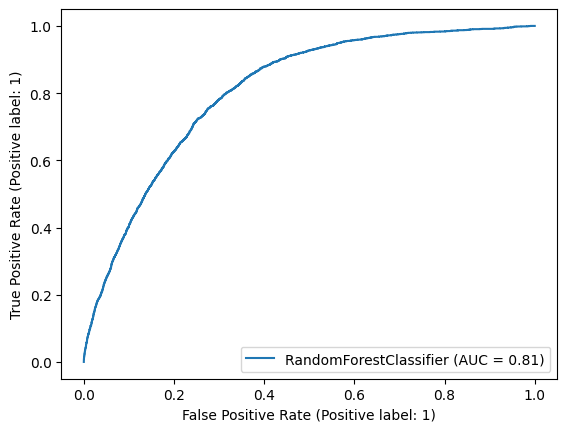

In [186]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_hyper_balanced, test_x, test_y)
plt.show()

In [187]:
#Tunned Random Forest trained on balanced data
from sklearn.metrics import confusion_matrix

test_predict_Y = rf_hyper_balanced.predict(test_x)
cm = confusion_matrix(test_y, test_predict_Y, labels=[0, 1])

FN = cm.sum(axis=0) - np.diag(cm)  
FP = cm.sum(axis=1) - np.diag(cm)
TN = np.diag(cm)
TP = cm.sum() - (FP + FN + TN)

print(cm)
print("False Positive Rates: ",FP)
print("False Negative Rates: ",FN)
print("True Positive Rates: ", TP)
print("True Negative Rates: ",TN)

[[15149  2630]
 [ 1088  1193]]
False Positive Rates:  [2630 1088]
False Negative Rates:  [1088 2630]
True Positive Rates:  [ 1193 15149]
True Negative Rates:  [15149  1193]


In [188]:
from sklearn.metrics import recall_score
test_predict_Y = rf_hyper_balanced.predict(test_x)
print("Recall tunned RF trained on balanced data: ",recall_score(test_y, test_predict_Y, average='binary'))

Recall tunned RF trained on balanced data:  0.5230162209557212


In [368]:
#Save model
pickle.dump(rf_hyper_balanced, open("rf_hyper_balanced.sav","wb"))

<h2>Modeling without readmitted_elsewhere_in30 and readmitted_elsewhere_in30</h2>
</br>
<p>Check for data leaks</p>

In [189]:
train_x_2 = train_x.drop(["readmitted_elsewhere_in30","readmitted_elsewhere_over30"],axis=1)
test_x_2 = test_x.drop(["readmitted_elsewhere_in30","readmitted_elsewhere_over30"],axis=1)

In [190]:
train_x_2.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,pat_duplicated,pat_duplicated_num
69983,200008020,103420926,3,0,50,-1000,3,1,1,1,...,0,0,0,1,0,0,1,1,1,3
52661,155492124,82706373,1,0,70,-1000,1,6,7,3,...,0,0,0,1,0,0,1,1,0,0


In [191]:
rf_classifier_d = RandomForestClassifier(n_estimators=250, max_depth=15, n_jobs=-1, criterion="entropy", random_state=43)

In [192]:
rf_classifier_d.fit(train_x_2, train_y)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=250,
                       n_jobs=-1, random_state=43)

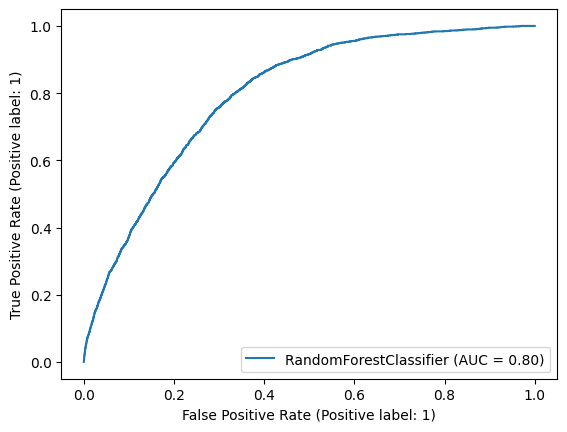

In [193]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_classifier_d, test_x_2, test_y)
plt.show()

That looks fine in terms of feature leaks. Nothing to suggest thos features were overly influential.
Lets explore the actual relationship between these values and readmitted.

Text(0.5, 1.0, 'Number of diabetes readmissions within 30 days vs frequency of readmission')

<Figure size 1000x600 with 0 Axes>

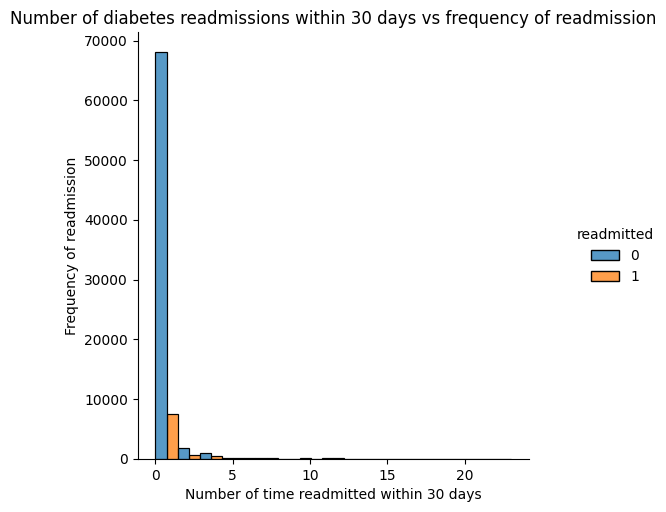

In [194]:
fig = plt.figure(figsize=(10,6))
ax=sns.displot(data=train, x="readmitted_elsewhere_in30", hue="readmitted", kind="hist", bins=16, multiple='dodge')
ax.set(xlabel="Number of time readmitted within 30 days", ylabel="Frequency of readmission")
plt.title("Number of diabetes readmissions within 30 days vs frequency of readmission")

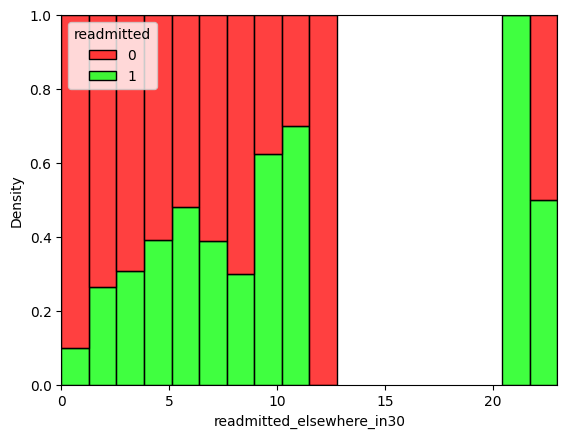

In [195]:
ax = sns.histplot(x = train["readmitted_elsewhere_in30"], hue=train['readmitted'], multiple="fill", 
                  stat = 'density', common_norm=True, palette=palette)

Text(0.5, 1.0, 'Number of diabetes readmissions in over 30 days vs frequency of readmission')

<Figure size 1000x600 with 0 Axes>

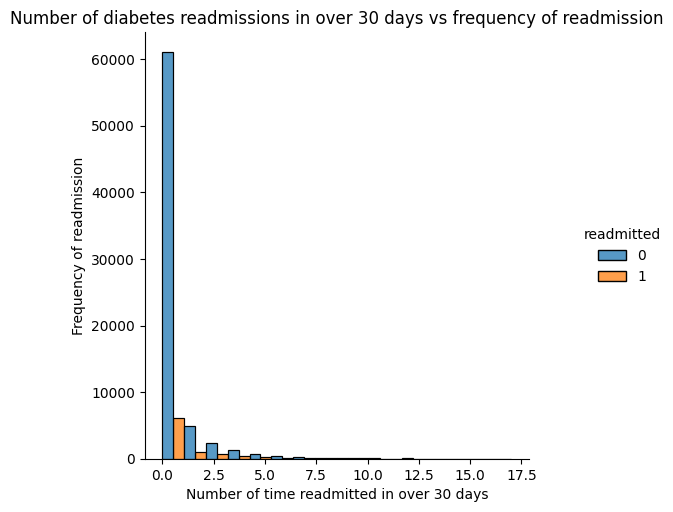

In [196]:
fig = plt.figure(figsize=(10,6))
ax=sns.displot(data=train, x="readmitted_elsewhere_over30", hue="readmitted", kind="hist", bins=16, multiple='dodge')
ax.set(xlabel="Number of time readmitted in over 30 days", ylabel="Frequency of readmission")
plt.title("Number of diabetes readmissions in over 30 days vs frequency of readmission")

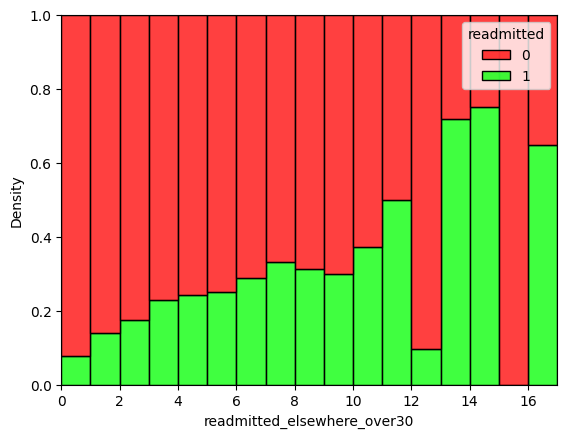

In [197]:
ax = sns.histplot(x = train["readmitted_elsewhere_over30"], hue=train['readmitted'], multiple="fill", 
                  stat = 'density', common_norm=True, palette=palette, bins=17)

<h2>Modeling with feature grouping</h2>

First, let's retrieve our features we would like to group

In [286]:
train_g = train_copy
test_g = test_copy

train_g['readmitted'].value_counts()

0    71288
1     8949
Name: readmitted, dtype: int64

In [327]:
#ICD9 code reference: https://www.aapc.com/codes/icd9-codes-range/

list_d = []
for i in range(140):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,1)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,1)

In [328]:
list_d = []
for i in range(140,240):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,2)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,2)

In [329]:
list_d = []
for i in range(240,280):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,3)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,3)

In [330]:
list_d = []
for i in range(0,100):
    list_d.append('250.{0:02}'.format(i))  

train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,3)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,3)

In [358]:
list_d = []
for i in range(0,10):
    list_d.append('250.{0:01}'.format(i))  

train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,3)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,3)

In [340]:
list_d = []
for i in range(280,290):
    list_d.append(str(i))
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,4)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,4)

In [341]:
list_d = []
for i in range(290,320):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,5)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,5)

In [342]:
list_d = []
for i in range(320,390):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,6)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,6)

In [343]:
list_d = []
for i in range(390,460):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,7)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,7)

In [344]:
list_d = []
for i in range(460,520):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,8)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,8)

In [345]:
list_d = []
for i in range(520,580):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,9)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,9)

In [346]:
list_d = []
for i in range(580,630):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,10)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,10)

In [347]:
list_d = []
for i in range(630,680):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,11)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,11)

In [348]:
list_d = []
for i in range(680,710):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,'12')
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,12)

In [349]:
list_d = []
for i in range(710,740):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,13)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,13)

In [350]:
list_d = []
for i in range(740,760):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,14)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,14)

In [351]:
list_d = []
for i in range(760,780):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,15)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,15)

In [352]:
list_d = []
for i in range(780,800):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,16)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,16)

In [353]:
list_d = []
for i in range(800,1000):
    list_d.append(str(i))  
    
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,17)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,17)

In [354]:
list_d = []
for i in range(0,1000):
    list_d.append('E{0:03}'.format(i))

train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,18)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,18)

In [360]:
list_d = []
for i in range(0,100):
    list_d.append('V{0:02}'.format(i))

train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace(list_d,19)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace(list_d,19)

In [362]:
train_g[['diag_1','diag_2','diag_3']] = train_g[['diag_1','diag_2','diag_3']].replace('?',20)
test_g[['diag_1','diag_2','diag_3']] = test_g[['diag_1','diag_2','diag_3']].replace('?',20)

In [363]:
train_g['diag_1'].value_counts()

7     24179
3      9008
8      8312
9      7312
16     6047
17     5282
1      4125
10     3995
13     3919
2      2681
5      1790
19     1268
6       923
4       868
11      474
14       36
20       18
Name: diag_1, dtype: int64

In [364]:
test_g['diag_1'].value_counts()

7     6033
3     2302
8     2009
9     1807
16    1512
17    1338
1     1021
10    1018
13     994
2      662
5      434
19     342
4      228
6      224
11     120
14      13
20       3
Name: diag_1, dtype: int64

In [386]:
#Replacing all types of "expired" with just expired
train_g['discharge_disposition_id'] = train_g['discharge_disposition_id'].replace([19,20,21],11)
test_g['discharge_disposition_id'] = test_g['discharge_disposition_id'].replace([19,20,21],11)

In [387]:
train_g['discharge_disposition_id'].value_counts()

1     47491
3     10965
6     10178
18     2914
2      1693
22     1581
11     1321
5       924
25      779
4       633
7       493
23      325
13      310
14      300
28      109
8        86
15       52
24       32
9        21
17        9
16        9
10        5
27        4
12        3
Name: discharge_disposition_id, dtype: int64

Ok, so I know I'm probably expected to go more in depth into grouping than this but I'm really having trouble deciding on groups. I feel like most of these classes are unique in some way and contain important, distinct information.

For now I'm just going to use the label encoder.

In [388]:
train_g['weight'] = train_g['weight'].replace('?',-1000)
test_g['weight'] = test_g['weight'].replace('?',-1000)
features_to_encode = train_g.columns[train_g.dtypes==object].tolist()
print("Features that still need encoding")
features_to_encode

Features that still need encoding


[]

In [389]:
le = LabelEncoder()

for feature in features_to_encode:
    train_g[feature]=le.fit_transform(train_g[feature].astype(str))
    test_g[feature]=le.transform(test_g[feature].astype(str))
    
train_g.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted,pat_duplicated,pat_duplicated_num,readmitted_elsewhere_in30,readmitted_elsewhere_over30
69983,200008020,103420926,3,0,50,-1000,3,1,1,1,...,1,0,0,1,1,0,1,3,1,1
52661,155492124,82706373,1,0,70,-1000,1,6,7,3,...,1,0,0,1,1,0,0,0,0,0
20701,72747984,104863896,3,0,80,-1000,6,1,17,1,...,1,0,0,0,1,0,0,0,0,0
95465,362017892,92785896,1,1,70,-1000,1,1,7,10,...,1,0,0,1,1,0,1,3,1,2
25424,84942864,4925457,3,0,90,-1000,1,1,6,11,...,1,0,0,0,1,0,0,0,0,0


In [390]:
train_g_y = train_g['readmitted']
test_g_y = test_g['readmitted']

train_g_x = train_g.drop(['readmitted'], axis=1)
test_g_x = test_g.drop(['readmitted'], axis=1)

<h4>Tunned Random Forest</h4>

In [391]:
clf_g_hyper = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='recall', n_jobs=-1)
clf_g_hyper.fit(train_g_x, train_g_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, 35],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250]},
             scoring='recall')

In [392]:
rf_g_hyper = clf_g_hyper.best_estimator_
rf_g_hyper.fit(train_g_x, train_g_y)

RandomForestClassifier(max_depth=35, n_estimators=250)

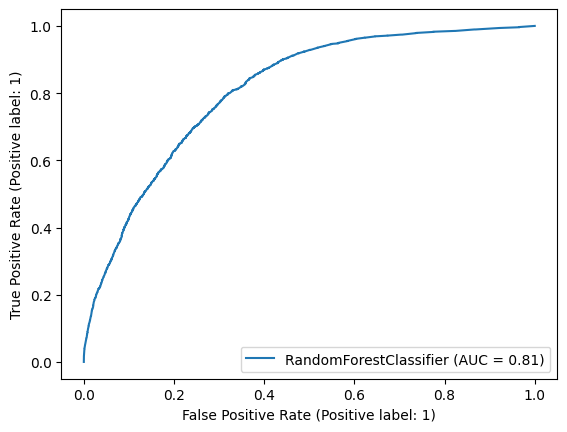

In [393]:
RocCurveDisplay.from_estimator(rf_g_hyper, test_g_x, test_g_y)
plt.show()

In [402]:
#Tunned random forest with more grouping
from sklearn.metrics import confusion_matrix

test_predict_Y = rf_g_hyper.predict(test_g_x)
cm = confusion_matrix(test_g_y, test_predict_Y, labels=[0, 1])

FN = cm.sum(axis=0) - np.diag(cm)  
FP = cm.sum(axis=1) - np.diag(cm)
TN = np.diag(cm)
TP = cm.sum() - (FP + FN + TN)

print(cm)
print("False Positive Rates: ",FP)
print("False Negative Rates: ",FN)
print("True Positive Rates: ", TP)
print("True Negative Rates: ",TN)

[[17756    23]
 [ 2192    89]]
False Positive Rates:  [  23 2192]
False Negative Rates:  [2192   23]
True Positive Rates:  [   89 17756]
True Negative Rates:  [17756    89]


In [395]:
test_predict_Y = rf_g_hyper.predict(test_g_x)
print("Recall tunned and grouped random forest: ",recall_score(test_y, test_predict_Y, average='binary'))

Recall tunned and grouped random forest:  0.039017974572555895


In [396]:
#Save model
pickle.dump(rf_g_hyper, open("rf_g_hyper.sav","wb"))

<h4>Tunned Random Forest Attempting to Maximize F1</h4>

In [397]:
clf_g_hyper_f1 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1', n_jobs=-1)
clf_g_hyper_f1.fit(train_g_x, train_g_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, 35],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250]},
             scoring='f1')

In [398]:
rf_g_hyper_f1 = clf_g_hyper_f1.best_estimator_
rf_g_hyper_f1.fit(train_g_x, train_g_y)

RandomForestClassifier(max_depth=25)

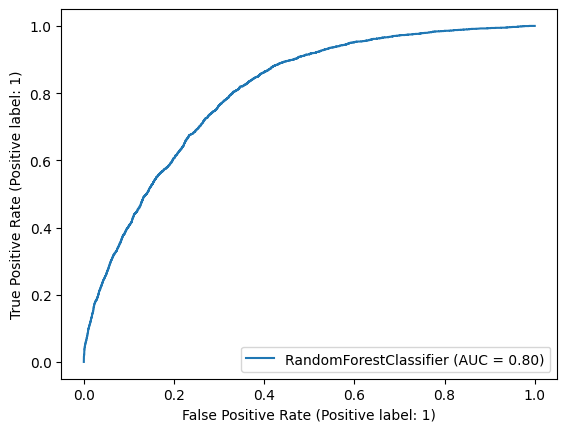

In [399]:
RocCurveDisplay.from_estimator(rf_g_hyper_f1, test_g_x, test_g_y)
plt.show()

In [403]:
#Tunned random forest with more grouping trying to optimize for f1 score, not recall
from sklearn.metrics import confusion_matrix

test_predict_Y = rf_g_hyper_f1.predict(test_g_x)
cm = confusion_matrix(test_g_y, test_predict_Y, labels=[0, 1])

FN = cm.sum(axis=0) - np.diag(cm)  
FP = cm.sum(axis=1) - np.diag(cm)
TN = np.diag(cm)
TP = cm.sum() - (FP + FN + TN)

print(cm)
print("False Positive Rates: ",FP)
print("False Negative Rates: ",FN)
print("True Positive Rates: ", TP)
print("True Negative Rates: ",TN)

[[17747    32]
 [ 2183    98]]
False Positive Rates:  [  32 2183]
False Negative Rates:  [2183   32]
True Positive Rates:  [   98 17747]
True Negative Rates:  [17747    98]


In [444]:
#Save model
pickle.dump(rf_g_hyper_f1, open("rf_g_hyper_f1.sav","wb"))

Mostly just for fun I'd like to see if the models are at least classifying all the expired patients correctly.

In [407]:
test_predict_Y = rf_g_hyper.predict(test_g_x[test_g_x['discharge_disposition_id']==11])
print("Predictions for only expired patients:")
test_predict_Y

Predictions for only expired patients:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [408]:
test_predict_Y = rf_g_hyper_f1.predict(test_g_x[test_g_x['discharge_disposition_id']==11])
print("Predictions for only expired patients (model optimizing f1 score):")
test_predict_Y

Predictions for only expired patients (model optimizing f1 score):


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<h4>XGBoost</h4>

In [414]:
xgb_g_model = xgb.XGBClassifier(n_estimators=250,eval_metric=recall_score,booster='gbtree',max_depth=15,eta='0.03',
                              colsample_bytree=0.5, early_Stopping_rounds=10, n_jobs=8, verbose_eval=1, objective='binary:logistic')
xgb_g_model.fit(train_g_x,train_g_y)

[17:02:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_Stopping_rounds", "verbose_eval" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_Stopping_rounds=10, early_stopping_rounds=None,
              enable_categorical=False, eta='0.03',
              eval_metric=<function recall_score at 0x0000027B0C306CB0>,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0299999993,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=15,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [415]:
test_predict_Y = xgb_g_model.predict(test_g_x)

cm = confusion_matrix(test_g_y, test_predict_Y, labels=[0, 1])
print(cm)

[[17743    36]
 [ 2132   149]]


In [416]:
#Save model
pickle.dump(xgb_g_model, open("xgb_g_model.sav","wb"))

<h3>Training models w/ grouping on balanced data</h3>

In [417]:
undersample = RandomUnderSampler(sampling_strategy=0.5) #Minority class to majority class ratio is 1:2
train_x_g_balanced, train_y_g_balanced = undersample.fit_resample(train_g_x, train_g_y)

<h4>XGBoost</h4>

In [419]:
xgb_g_b_model = xgb.XGBClassifier(n_estimators=250,eval_metric=recall_score,booster='gbtree',max_depth=15,eta='0.03',
                              colsample_bytree=0.5, early_Stopping_rounds=10, n_jobs=8, verbose_eval=1, objective='binary:logistic')
xgb_g_b_model.fit(train_x_g_balanced,train_y_g_balanced)


[17:03:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_Stopping_rounds", "verbose_eval" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_Stopping_rounds=10, early_stopping_rounds=None,
              enable_categorical=False, eta='0.03',
              eval_metric=<function recall_score at 0x0000027B0C306CB0>,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0299999993,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=15,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

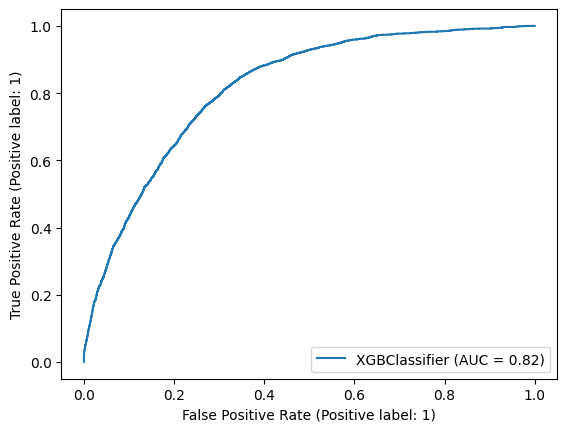

In [458]:
RocCurveDisplay.from_estimator(xgb_g_b_model, test_g_x, test_g_y)
plt.show()

In [420]:
test_predict_Y = xgb_g_b_model.predict(test_g_x)

cm = confusion_matrix(test_g_y, test_predict_Y, labels=[0, 1])
print(cm)

[[15186  2593]
 [ 1055  1226]]


In [421]:
#Save model
pickle.dump(xgb_g_b_model, open("xgb_g_b_model.sav","wb"))

<h2>Evaluation!</h2>

In [445]:
rf = pickle.load(open("rf_2.sav", 'rb'))
rf_hyper = pickle.load(open("rf_hyper_2.sav", 'rb'))
xgb_m = pickle.load(open("xgb_model_2.sav", 'rb'))
rf_hyper_b = pickle.load(open("rf_hyper_balanced.sav", 'rb'))
rf_g_hyper = pickle.load(open("rf_g_hyper.sav", 'rb'))
rf_g_hyper_f1 = pickle.load(open("rf_g_hyper_f1.sav", 'rb'))
xgb_g = pickle.load(open("xgb_g_model.sav", 'rb'))
xgb_g_b = pickle.load(open("xgb_g_b_model.sav", 'rb'))

models = ["Random Forest", "Tunned Random Forest", "XGBoost", "Tunned Random Forest on balanced data",
         "Tunned Random Forest w/ grouping", "Tunned Random Forest w/ grouping optimizing f1 score", 
          "XGBoost w/ grouping", "XGBoost w/ grouping on balanced data", "Random Forest w/ grouping on balanced data"]

In [446]:
#Precision
from sklearn.metrics import precision_score

precision = []

test_predict_Y = rf.predict(test_x)
precision.append(precision_score(test_y, test_predict_Y, average='binary'))
print("Precision random forest: ",precision_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = rf_hyper.predict(test_x)
precision.append(precision_score(test_y, test_predict_Y, average='binary'))
print("Precision random forest w/ HP Tunning: ",precision_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = xgb_m.predict(test_x)
precision.append(precision_score(test_y, test_predict_Y, average='binary'))
print("Precision XGBoost: ",precision_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = rf_hyper_b.predict(test_x)
precision.append(precision_score(test_y, test_predict_Y, average='binary'))
print("Precision tunned random forest w/ balanced data: ",precision_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = rf_g_hyper.predict(test_g_x)
precision.append(precision_score(test_g_y, test_predict_Y, average='binary'))
print("Precision tunned random forest w/ grouping: ",precision_score(test_g_y, test_predict_Y, average='binary'))

test_predict_Y = rf_g_hyper_f1.predict(test_g_x)
precision.append(precision_score(test_g_y, test_predict_Y, average='binary'))
print("Precision tunned random forest w/ grouping, f1 optimized: ",precision_score(test_g_y, test_predict_Y, average='binary'))

test_predict_Y = xgb_g.predict(test_g_x)
precision.append(precision_score(test_g_y, test_predict_Y, average='binary'))
print("Precision XGBoost w/ grouping: ",precision_score(test_g_y, test_predict_Y, average='binary'))

test_predict_Y = xgb_g_b.predict(test_g_x)
precision.append(precision_score(test_g_y, test_predict_Y, average='binary'))
print("Precision XGBoost w/ grouping and balanced data: ",precision_score(test_g_y, test_predict_Y, average='binary'))

Precision random forest:  0.8214285714285714
Precision random forest w/ HP Tunning:  0.6691729323308271
Precision XGBoost:  0.766497461928934
Precision tunned random forest w/ balanced data:  0.3120585927282239
Precision tunned random forest w/ grouping:  0.7946428571428571
Precision tunned random forest w/ grouping, f1 optimized:  0.7946428571428571
Precision XGBoost w/ grouping:  0.8054054054054054
Precision XGBoost w/ grouping and balanced data:  0.32102644671379943


In [468]:
#recall
from sklearn.metrics import recall_score

recall = []

test_predict_Y = rf.predict(test_x)
recall.append(recall_score(test_y, test_predict_Y, average='binary'))
print("Recall random forest: ",recall_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = rf_hyper.predict(test_x)
recall.append(recall_score(test_y, test_predict_Y, average='binary'))
print("Recall random forest w/ HP Tunning: ",recall_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = xgb_m.predict(test_x)
recall.append(recall_score(test_y, test_predict_Y, average='binary'))
print("Recall XGBoost: ",recall_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = rf_hyper_b.predict(test_x)
recall.append(recall_score(test_y, test_predict_Y, average='binary'))
print("Recall tunned random forest w/ balanced data: ",recall_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = rf_g_hyper.predict(test_g_x)
recall.append(recall_score(test_g_y, test_predict_Y, average='binary'))
print("Recall tunned random forest w/ grouping: ",recall_score(test_g_y, test_predict_Y, average='binary'))

test_predict_Y = rf_g_hyper_f1.predict(test_g_x)
recall.append(recall_score(test_g_y, test_predict_Y, average='binary'))
print("Recall tunned random forest w/ grouping, f1 optimized: ",recall_score(test_g_y, test_predict_Y, average='binary'))

test_predict_Y = xgb_g.predict(test_g_x)
recall.append(recall_score(test_g_y, test_predict_Y, average='binary'))
print("Recall XGBoost w/ grouping: ",recall_score(test_g_y, test_predict_Y, average='binary'))

test_predict_Y = xgb_g_b.predict(test_g_x)
recall.append(recall_score(test_g_y, test_predict_Y, average='binary'))
print("Recall XGBoost w/ grouping and balanced data: ",recall_score(test_g_y, test_predict_Y, average='binary'))

Recall random forest:  0.020166593599298552
Recall random forest w/ HP Tunning:  0.039017974572555895
Recall XGBoost:  0.0661990355107409
Recall tunned random forest w/ balanced data:  0.5230162209557212
Recall tunned random forest w/ grouping:  0.039017974572555895
Recall tunned random forest w/ grouping, f1 optimized:  0.039017974572555895
Recall XGBoost w/ grouping:  0.06532222709338009
Recall XGBoost w/ grouping and balanced data:  0.5374835598421744


In [448]:
#F1 Score
#Harmonic mean of precision and recall
from sklearn.metrics import f1_score

f1 = []

test_predict_Y = rf.predict(test_x)
f1.append(f1_score(test_y, test_predict_Y, average='binary'))
print("F1 random forest: ",f1_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = rf_hyper.predict(test_x)
f1.append(f1_score(test_y, test_predict_Y, average='binary'))
print("F1 random forest w/ HP Tunning: ",f1_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = xgb_m.predict(test_x)
f1.append(f1_score(test_y, test_predict_Y, average='binary'))
print("F1 XGBoost: ",f1_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = rf_hyper_b.predict(test_x)
f1.append(f1_score(test_y, test_predict_Y, average='binary'))
print("F1 tunned random forest w/ balanced data: ",f1_score(test_y, test_predict_Y, average='binary'))

test_predict_Y = rf_g_hyper.predict(test_g_x)
f1.append(f1_score(test_g_y, test_predict_Y, average='binary'))
print("F1 tunned random forest w/ grouping: ",f1_score(test_g_y, test_predict_Y, average='binary'))

test_predict_Y = rf_g_hyper_f1.predict(test_g_x)
f1.append(f1_score(test_g_y, test_predict_Y, average='binary'))
print("F1 tunned random forest w/ grouping, f1 optimized: ",f1_score(test_g_y, test_predict_Y, average='binary'))

test_predict_Y = xgb_g.predict(test_g_x)
f1.append(f1_score(test_g_y, test_predict_Y, average='binary'))
print("F1 XGBoost w/ grouping: ",f1_score(test_g_y, test_predict_Y, average='binary'))

test_predict_Y = xgb_g_b.predict(test_g_x)
f1.append(f1_score(test_g_y, test_predict_Y, average='binary'))
print("F1 XGBoost w/ grouping and balanced data: ",f1_score(test_g_y, test_predict_Y, average='binary'))

F1 random forest:  0.03936670945656825
F1 random forest w/ HP Tunning:  0.07373653686826845
F1 XGBoost:  0.12187247780468119
F1 tunned random forest w/ balanced data:  0.3908912188728702
F1 tunned random forest w/ grouping:  0.07438361888842457
F1 tunned random forest w/ grouping, f1 optimized:  0.07438361888842457
F1 XGBoost w/ grouping:  0.12084347120843471
F1 XGBoost w/ grouping and balanced data:  0.4019672131147541


In [449]:
#Accuracy score
from sklearn.metrics import accuracy_score

accuracy = []

test_predict_Y = rf.predict(test_x)
accuracy.append(accuracy_score(test_y, test_predict_Y))
print("Accuracy random forest: ",accuracy_score(test_y, test_predict_Y))

test_predict_Y = rf_hyper.predict(test_x)
accuracy.append(accuracy_score(test_y, test_predict_Y))
print("Accuracy random forest w/ HP Tunning: ",accuracy_score(test_y, test_predict_Y))

test_predict_Y = xgb_m.predict(test_x)
accuracy.append(accuracy_score(test_y, test_predict_Y))
print("Accuracy XGBoost: ",accuracy_score(test_y, test_predict_Y))

test_predict_Y = rf_hyper_b.predict(test_x)
accuracy.append(accuracy_score(test_y, test_predict_Y))
print("Accuracy tunned random forest w/ balanced data: ",accuracy_score(test_y, test_predict_Y))

test_predict_Y = rf_g_hyper.predict(test_g_x)
accuracy.append(accuracy_score(test_g_y, test_predict_Y))
print("Accuracy tunned random forest w/ grouping: ",accuracy_score(test_g_y, test_predict_Y))

test_predict_Y = rf_g_hyper_f1.predict(test_g_x)
accuracy.append(accuracy_score(test_g_y, test_predict_Y))
print("Accuracy tunned random forest w/ grouping, f1 optimized: ",accuracy_score(test_g_y, test_predict_Y))

test_predict_Y = xgb_g.predict(test_g_x)
accuracy.append(accuracy_score(test_g_y, test_predict_Y))
print("Accuracy XGBoost w/ grouping: ",accuracy_score(test_g_y, test_predict_Y))

test_predict_Y = xgb_g_b.predict(test_g_x)
accuracy.append(accuracy_score(test_g_y, test_predict_Y))
print("Accuracy XGBoost w/ grouping and balanced data: ",accuracy_score(test_g_y, test_predict_Y))

Accuracy random forest:  0.888085742771685
Accuracy random forest w/ HP Tunning:  0.8885343968095712
Accuracy XGBoost:  0.8915254237288136
Accuracy tunned random forest w/ balanced data:  0.8146560319042871
Accuracy tunned random forest w/ grouping:  0.8895812562313061
Accuracy tunned random forest w/ grouping, f1 optimized:  0.8895812562313061
Accuracy XGBoost w/ grouping:  0.8919242273180459
Accuracy XGBoost w/ grouping and balanced data:  0.8181455633100698


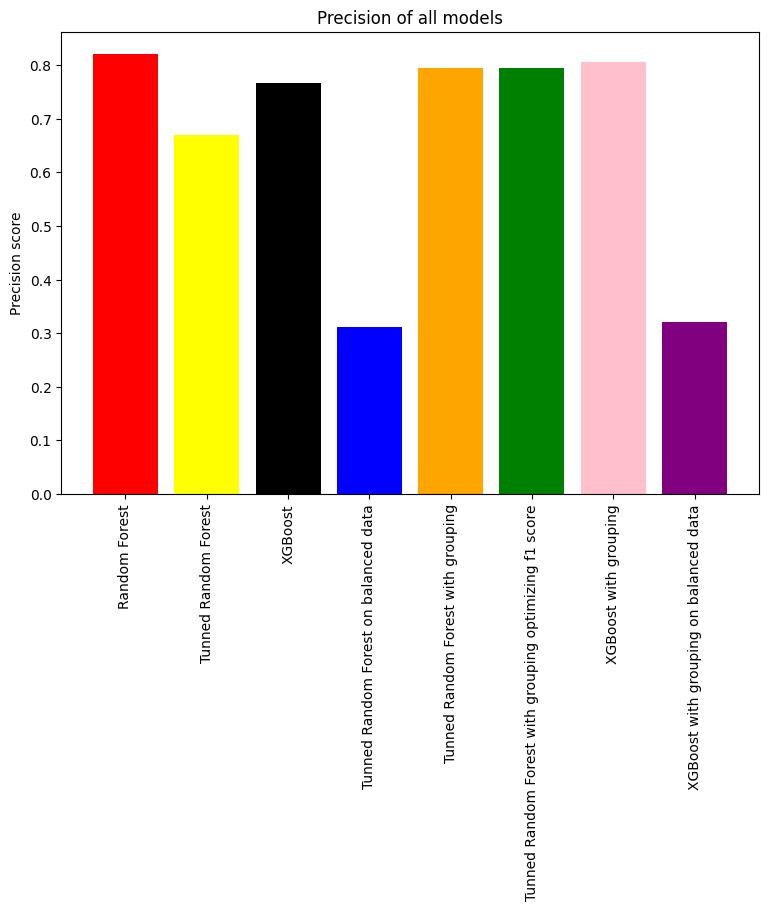

In [450]:
figure(figsize=(9,6))

plt.bar(x=np.arange(len(models)), height=precision, align='center', 
        color=['red','yellow','black','blue','orange','green','pink','purple'])
plt.xticks(np.arange(len(models)), models)
plt.tick_params(axis='x', rotation=90)
plt.title("Precision of all models")
plt.ylabel("Precision score")


plt.show()

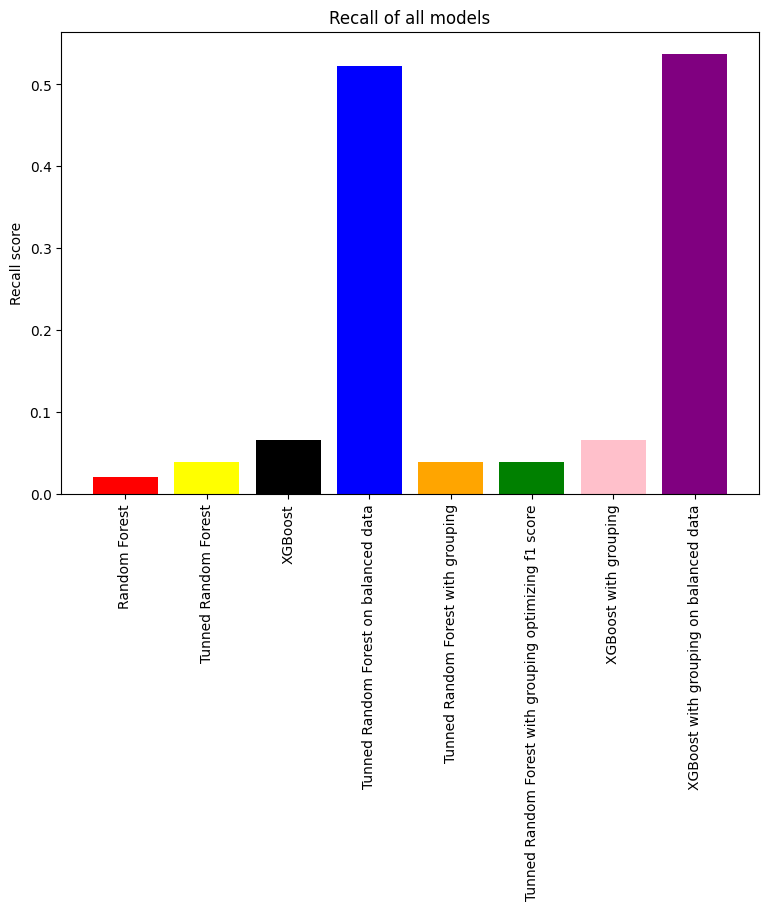

In [451]:
figure(figsize=(9,6))

plt.bar(x=np.arange(len(models)), height=recall, align='center', 
        color=['red','yellow','black','blue','orange','green','pink','purple'])
plt.xticks(np.arange(len(models)), models)
plt.tick_params(axis='x', rotation=90)
plt.title("Recall of all models")
plt.ylabel("Recall score")


plt.show()

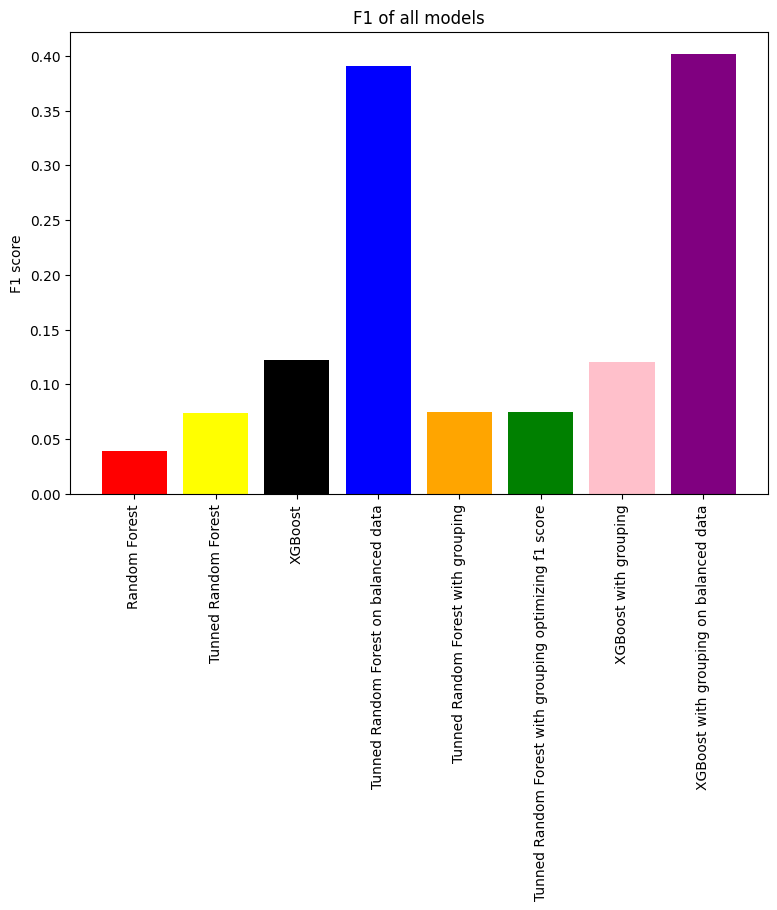

In [452]:
figure(figsize=(9,6))

plt.bar(x=np.arange(len(models)), height=f1, align='center', 
        color=['red','yellow','black','blue','orange','green','pink','purple'])
plt.xticks(np.arange(len(models)), models)
plt.tick_params(axis='x', rotation=90)
plt.title("F1 of all models")
plt.ylabel("F1 score")


plt.show()

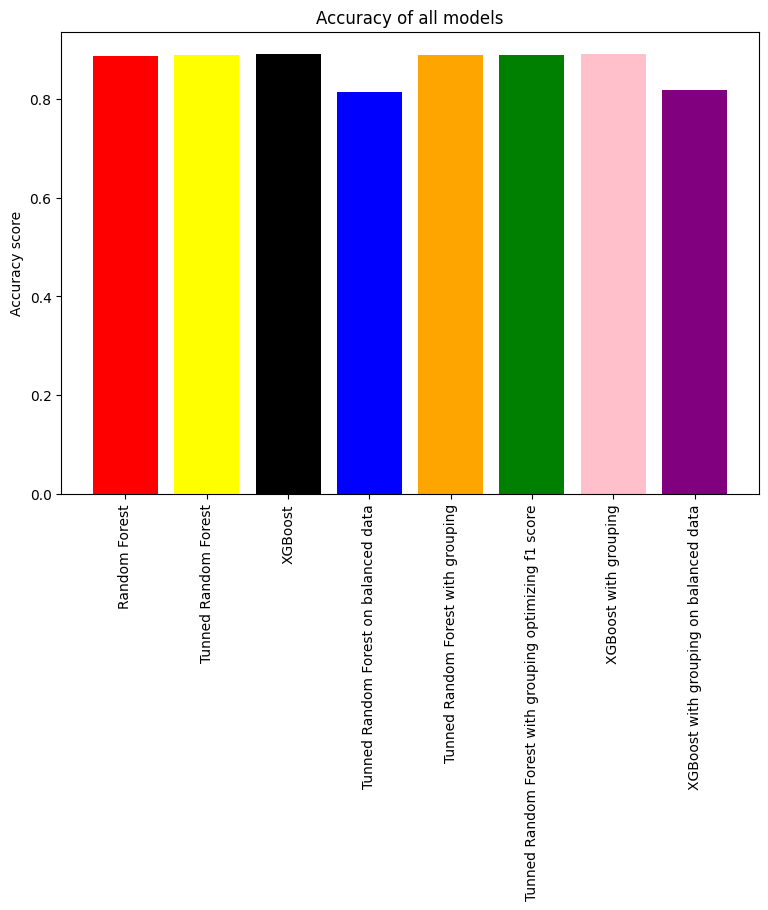

In [453]:
figure(figsize=(9,6))

plt.bar(x=np.arange(len(models)), height=accuracy, align='center', 
        color=['red','yellow','black','blue','orange','green','pink','purple'])
plt.xticks(np.arange(len(models)), models)
plt.tick_params(axis='x', rotation=90)
plt.title("Accuracy of all models")
plt.ylabel("Accuracy score")


plt.show()